Assignment7 - Assignment on Classification technique Every year many students give the GRE
exam to get admission in foreign Universities. The data set contains GRE
Scores (out of 340), TOEFL Scores (out of 120), University Rating (out of
5), Statement of Purpose strength (out of 5), Letter of Recommendation
strength (out of 5), Undergraduate GPA (out of 10), Research Experience
(0=no, 1=yes), Admitted (0=no, 1=yes). Admitted is the target variable. Data
Set: https://www.kaggle.com/mohansacharya/graduate-admissions The
counselor of the firm is supposed check whether the student will get an
admission or not based on his/her GRE score and Academic Score. So to
help the counselor to take appropriate decisions build a machine learning
model classifier using Decision tree to predict whether a student will get
admission or not.
a) Apply Data pre-processing (Label Encoding, Data Transformation....)
techniques if necessary.
b) Perform data-preparation (Train-Test Split)
c) Apply Machine Learning Algorithm
d) Evaluate Model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv("Admission_Predict_Ver1.1.csv")

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.rename(columns={'Chance of Admit ': 'Chance of Admit'}, inplace=True)

In [5]:
# Create Target Variable (Admitted: 1 if Chance of Admit >= 0.5, else 0)
df['Admitted'] = (df['Chance of Admit'] >= 0.5).astype(int)

In [6]:
# Selecting Relevant Features
features = ['GRE Score', 'TOEFL Score', 'CGPA']  # Using GRE & Academic Score (CGPA)
X = df[features]
y = df['Admitted']

In [7]:
# Data Normalization (Standard Scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Splitting Data into Train & Test (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [9]:
# Applying Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [10]:
# Predictions
y_pred = dt_classifier.predict(X_test)

In [11]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [12]:

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 0.93

Confusion Matrix:
 [[ 4  5]
 [ 2 89]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.44      0.53         9
           1       0.95      0.98      0.96        91

    accuracy                           0.93       100
   macro avg       0.81      0.71      0.75       100
weighted avg       0.92      0.93      0.92       100



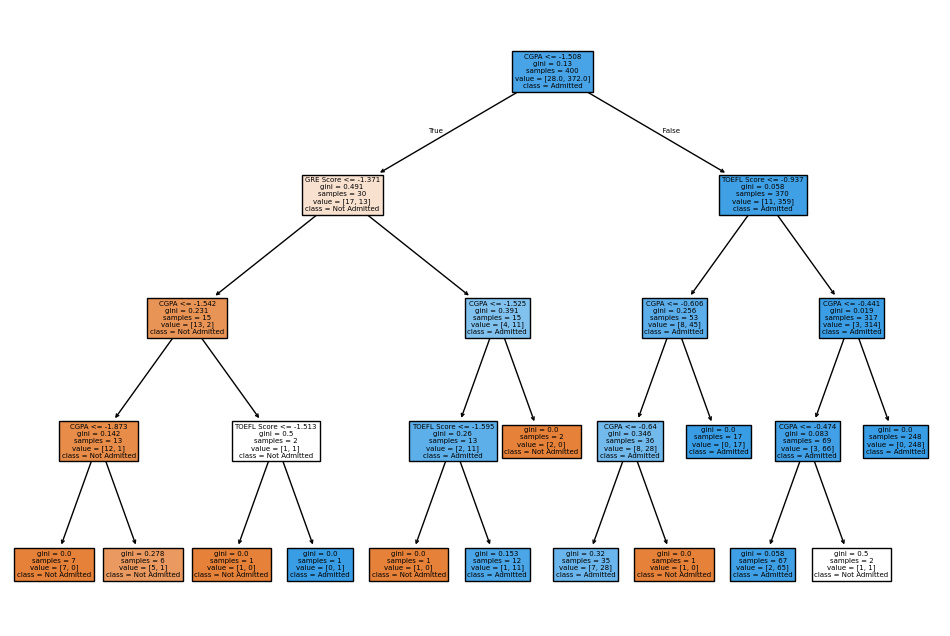

In [13]:
# Visualizing the Decision Tree
from sklearn.tree import plot_tree
plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, feature_names=features, class_names=['Not Admitted', 'Admitted'], filled=True)
plt.show()